In [1]:
#Importing libraries
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Dataset Description: Life Expectancy Data


This dataset provides data for 193 countries ranginf from 2000 to 2015 years. This data contains 2938 rowa which are characterized into 22 columns.These features can be categorized into two groups:

Health factors which are originally provided by the Global Health Observatory (GHO) data repository under the World Health Organization (WHO)

Economic factors which have been collected by the United Nation (UN) website.
This dataset contains health and economic factors from various countries, influencing life expectancy.

Below is the detailed description of each variable:



| Variable                            | Type     | Description |
|-------------------------------------|----------|-------------|
| `Country`                           | Factor   | Country name |
| `Year`                              | Numeric  | Year of the data |
| `Status`                            | Factor   | Country status of developed or developing |
| `Life_Expectancy`                   | Numeric  | Life expectancy in age |
| `Adult_Mortality`                   | Numeric  | Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) |
| `infant.deaths`                     | Numeric  | Number of Infant Deaths per 1000 population |
| `Alcohol`                           | Numeric  | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) |
| `percentage.expenditure`            | Numeric  | Expenditure on health as a percentage of Gross Domestic Product per capita(%) |
| `Hepatitis.B`                       | Numeric  | Hepatitis B (HepB) immunization coverage among 1-year-olds (%) |
| `Measles`                           | Numeric  | Number of reported measles cases per 1000 population |
| `BMI`                               | Numeric  | Average Body Mass Index of entire population |
| `under.five.deaths`                 | Numeric  | Number of under-five deaths per 1000 population |
| `Polio`                             | Numeric  | Polio (Pol3) immunization coverage among 1-year-olds (%) |
| `Total.expenditure`                 | Numeric  | General government expenditure on health as a percentage of total government expenditure (%) |
| `Diphtheria`                        | Numeric  | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) |
| `HIV.AIDS`                          | Numeric  | Deaths per 1,000 live births HIV/AIDS (0-4 years) |
| `GDP`                               | Numeric  | Gross Domestic Product per capita (in USD) |
| `Population`                        | Numeric  | Population of the country |
| `thinness..1.19.years`              | Numeric  | Prevalence of thinness among children and adolescents for Age 10 to 19 (%) |
| `thinness.5.9.years`                | Numeric  | Prevalence of thinness among children for Age 5 to 9(%) |
| `Income.composition.of.resources`   | Numeric  | Human Development Index in terms of income composition of resources (index ranging from 0 to 1) |
| `Schooling`                         | Numeric  | Number of years of Schooling (years) |



In [2]:
df <- read.csv("/content/Life Expectancy Data.csv")
head(df)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


In [3]:
dim(df)

[1] 2938   22

Country and Year were removed as they are not useful for our analysis.

In [4]:
df <- subset(df, select = -c(Country, Year))

# Data Cleaning

In [5]:
null_values <- colSums(is.na(df))
print(null_values)

                         Status                 Life.expectancy 
                              0                              10 
                Adult.Mortality                   infant.deaths 
                             10                               0 
                        Alcohol          percentage.expenditure 
                            194                               0 
                    Hepatitis.B                         Measles 
                            553                               0 
                            BMI               under.five.deaths 
                             34                               0 
                          Polio               Total.expenditure 
                             19                             226 
                     Diphtheria                        HIV.AIDS 
                             19                               0 
                            GDP                      Population 
                         

There are 40% of missing values in the dataset. Hence we will proceed with data cleaning process further.

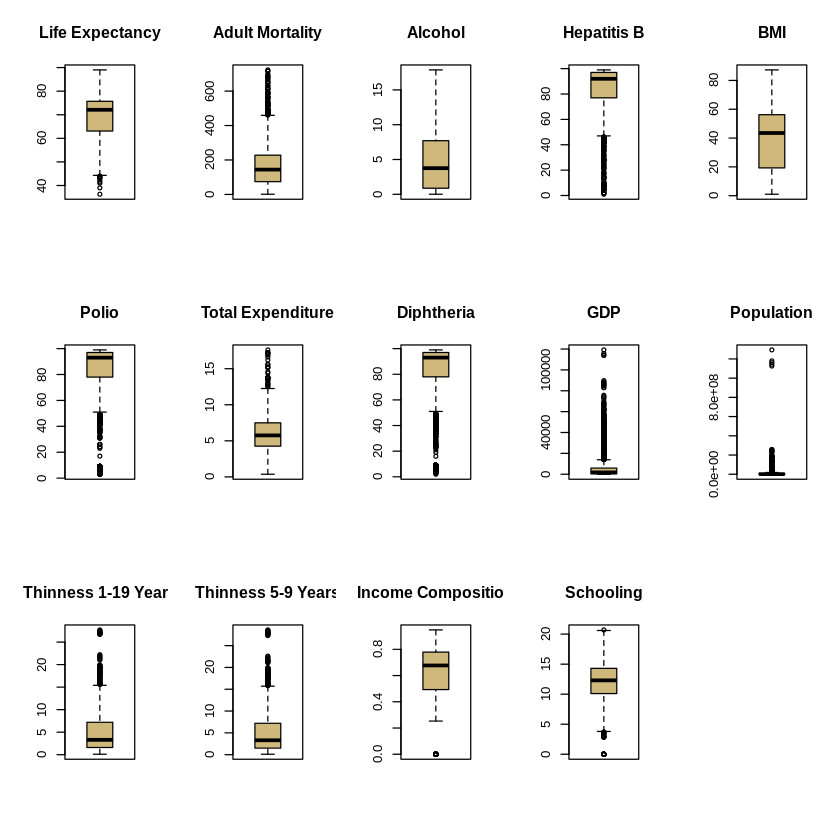

In [6]:
par(mfrow = c(3, 5))
boxplot(df$Life.expectancy, main = "Life Expectancy", col = "#CFB87C")
boxplot(df$Adult.Mortality, main = "Adult Mortality", col = "#CFB87C")
boxplot(df$Alcohol, main = "Alcohol", col = "#CFB87C")
boxplot(df$Hepatitis.B, main = "Hepatitis B", col = "#CFB87C")
boxplot(df$BMI, main = "BMI", col = "#CFB87C")
boxplot(df$Polio, main = "Polio", col = "#CFB87C")
boxplot(df$Total.expenditure, main = "Total Expenditure", col = "#CFB87C")
boxplot(df$Diphtheria, main = "Diphtheria", col = "#CFB87C")
boxplot(df$GDP, main = "GDP", col = "#CFB87C")
boxplot(df$Population, main = "Population", col = "#CFB87C")
boxplot(df$thinness..1.19.years, main = "Thinness 1-19 Years", col = "#CFB87C")
boxplot(df$thinness.5.9.years, main = "Thinness 5-9 Years", col = "#CFB87C")
boxplot(df$Income.composition.of.resources, main = "Income Composition", col = "#CFB87C")
boxplot(df$Schooling, main = "Schooling", col = "#CFB87C")



From the above box plots, we are replacing the boxplots with more outilers with mean and the box plots containing less outliers are replaced with median.

In [7]:
# Data Cleaning
Life.expectancy_median <- median(df$Life.expectancy, na.rm = TRUE)
Adult.Mortality_median <- median(df$Adult.Mortality, na.rm = TRUE)
Hepatitis.B_median <- median(df$Hepatitis.B, na.rm = TRUE)
Polio_median <- median(df$Polio, na.rm = TRUE)
Diphtheria_median <- median(df$Diphtheria, na.rm = TRUE)
Total.expenditure_median <- median(df$Total.expenditure, na.rm = TRUE)
GDP_median <- median(df$GDP, na.rm = TRUE)
Population_median <- median(df$Population, na.rm = TRUE)
thinness..1.19.years_median <- median(df$thinness..1.19.years, na.rm = TRUE)
thinness.5.9.years_median <- median(df$thinness.5.9.years, na.rm = TRUE)
Schooling_median <- median(df$Schooling, na.rm = TRUE)


In [8]:
# Data cleaning
Alcohol_mean <- mean(df$Alcohol,  na.rm = TRUE)
BMI_mean <- mean(df$BMI,  na.rm = TRUE)
Income.composition.of.resources_mean <- mean(df$Income.composition.of.resources,  na.rm = TRUE)

In [9]:
# Medians
df$Life.expectancy[is.na(df$Life.expectancy)] <- Life.expectancy_median
df$Adult.Mortality[is.na(df$Adult.Mortality)] <- Adult.Mortality_median
df$Hepatitis.B[is.na(df$Hepatitis.B)] <- Hepatitis.B_median
df$Polio[is.na(df$Polio)] <- Polio_median
df$Diphtheria[is.na(df$Diphtheria)] <- Diphtheria_median
df$Total.expenditure[is.na(df$Total.expenditure)] <- Total.expenditure_median
df$GDP[is.na(df$GDP)] <- GDP_median
df$Population[is.na(df$Population)] <- Population_median
df$thinness..1.19.years[is.na(df$thinness..1.19.years)] <- thinness..1.19.years_median
df$thinness.5.9.years[is.na(df$thinness.5.9.years)] <- thinness.5.9.years_median
df$Schooling[is.na(df$Schooling)] <- Schooling_median
# Means
df$Alcohol[is.na(df$Alcohol)] <- Alcohol_mean
df$BMI[is.na(df$BMI)] <- BMI_mean
df$Income.composition.of.resources[is.na(df$Income.composition.of.resources)] <- Income.composition.of.resources_mean

In [10]:
colSums(is.na(df))

Status                 Life.expectancy 
                              0                               0 
                Adult.Mortality                   infant.deaths 
                              0                               0 
                        Alcohol          percentage.expenditure 
                              0                               0 
                    Hepatitis.B                         Measles 
                              0                               0 
                            BMI               under.five.deaths 
                              0                               0 
                          Polio               Total.expenditure 
                              0                               0 
                     Diphtheria                        HIV.AIDS 
                              0                               0 
                            GDP                      Population 
                              0                               0 
           thinness..1.19.years              thinness.5.9.years 
                              0                               0 
Income.composition.of.resources                       Schooling 
                              0                               0

In [11]:
df$Status <- as.factor(df$Status)

Now, let's procced with the correlation matrix and check that if there is any correlation between variables and see the possibility of collinearity, which we need to avoid in our model.

In [12]:
# Install the ggcorrplot package
install.packages("ggcorrplot")

# Load the ggcorrplot package
library(ggcorrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




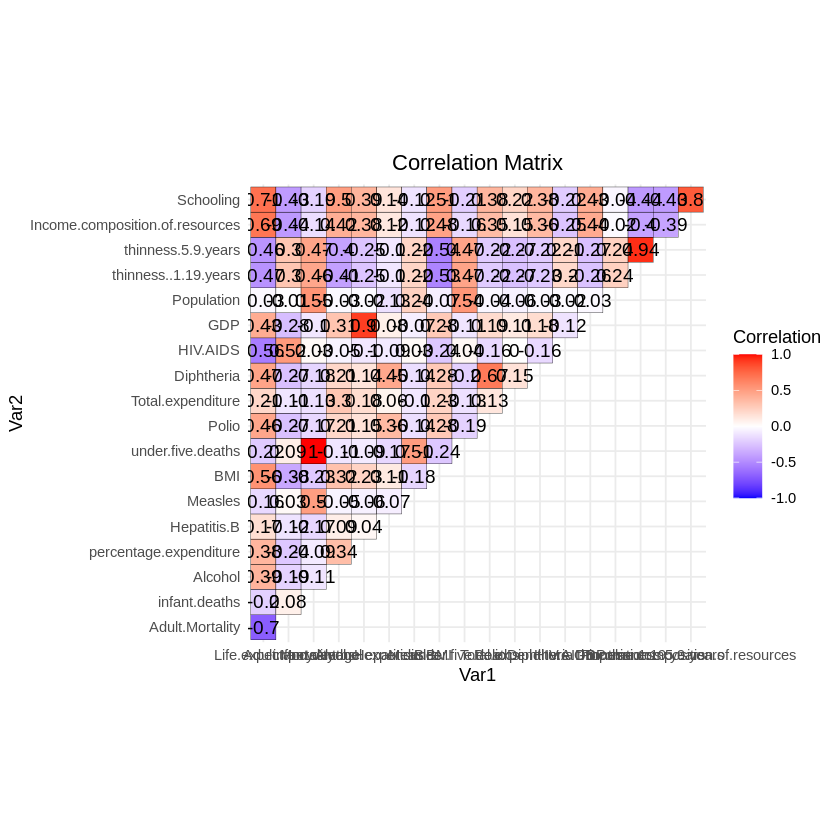

In [13]:
corr <- cor(df[, sapply(df, is.numeric)])

# Create the correlation plot
ggcorrplot(corr, type = "upper", lab = TRUE,
           outline.color = "black", lab_size = 4,
           legend.title = "Correlation") +
  ggtitle("Correlation Matrix") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [14]:
corr

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Life.expectancy,1.00000000,-0.696390066,-0.19676906,0.39067526,0.38141810,0.17021864,-0.15776659,0.56045296,-0.22273822,0.45839934,0.2088436664,0.47221082,-0.5567034182,0.43046130,-0.029013877,-0.46800224,-0.4624732,0.6925595,0.71305353
Adult.Mortality,-0.69639007,1.000000000,0.07889001,-0.18992073,-0.24262798,-0.12328674,0.03129296,-0.38214320,0.09428011,-0.27000169,-0.1117958609,-0.27030071,0.5238864994,-0.28143425,-0.005291655,0.29613500,0.3016343,-0.4401431,-0.43341464
infant.deaths,-0.19676906,0.078890013,1.00000000,-0.11381227,-0.08561222,-0.16742088,0.50112834,-0.22721997,0.99662888,-0.17089558,-0.1262683518,-0.17537621,0.0252313184,-0.10282895,0.551667463,0.46481096,0.4704450,-0.1436628,-0.19095097
Alcohol,0.39067526,-0.189920727,-0.11381227,1.00000000,0.33963429,0.09129769,-0.05105499,0.31807030,-0.11077713,0.21239474,0.2954840435,0.21387799,-0.0486497065,0.31257906,-0.027341304,-0.41493751,-0.4038808,0.4160992,0.49933013
percentage.expenditure,0.38141810,-0.242627982,-0.08561222,0.33963429,1.00000000,0.03952841,-0.05659568,0.22853723,-0.08785231,0.14614776,0.1755588126,0.14250591,-0.0978568189,0.90181910,-0.016887513,-0.24961019,-0.2511443,0.3803736,0.38607573
Hepatitis.B,0.17021864,-0.123286738,-0.16742088,0.09129769,0.03952841,1.00000000,-0.07302122,0.11243754,-0.17054861,0.36489030,0.0559879808,0.44915077,-0.0854967249,0.07665968,-0.125005510,-0.09757613,-0.1005755,0.1175161,0.14127478
Measles,-0.15776659,0.031292960,0.50112834,-0.05105499,-0.05659568,-0.07302122,1.00000000,-0.17592529,0.50780871,-0.13666917,-0.1041326835,-0.14238452,0.0308987179,-0.06925313,0.237187937,0.22487023,0.2211378,-0.1157641,-0.12079866
BMI,0.56045296,-0.382143199,-0.22721997,0.31807030,0.22853723,0.11243754,-0.17592529,1.00000000,-0.23758588,0.28228497,0.2314414475,0.28118808,-0.2435475850,0.27523121,-0.069700436,-0.53165149,-0.5385326,0.4798374,0.50689436
under.five.deaths,-0.22273822,0.094280105,0.99662888,-0.11077713,-0.08785231,-0.17054861,0.50780871,-0.23758588,1.00000000,-0.18886429,-0.1279601236,-0.19580754,0.0380615124,-0.10609293,0.539259660,0.46669740,0.4711667,-0.1615334,-0.20624211
Polio,0.45839934,-0.270001686,-0.17089558,0.21239474,0.14614776,0.36489030,-0.13666917,0.28228497,-0.18886429,1.00000000,0.1310370162,0.67397675,-0.1591282179,0.18992570,-0.044812892,-0.21840103,-0.2191677,0.3477593,0.37583000


In [15]:
corr[corr < 0.75 | corr == 1] <- NA
corr

,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
Life.expectancy,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Adult.Mortality,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
infant.deaths,NA,NA,NA,NA,NA,NA,NA,NA,0.9966289,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Alcohol,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
percentage.expenditure,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.9018191,NA,NA,NA,NA,NA
Hepatitis.B,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Measles,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BMI,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
under.five.deaths,NA,NA,0.9966289,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Polio,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


From the correlation matrix we can remove these features:`infant.deaths`,`percentage.expenditure`,`thinness.5.9.years`,`Schooling` as they are highly correlated(greater than 0.75).

In [16]:
df <- df %>%
  select(-infant.deaths, -percentage.expenditure, -thinness.5.9.years,-Schooling)

In [17]:
colSums(is.na(df))

Status                 Life.expectancy 
                              0                               0 
                Adult.Mortality                         Alcohol 
                              0                               0 
                    Hepatitis.B                         Measles 
                              0                               0 
                            BMI               under.five.deaths 
                              0                               0 
                          Polio               Total.expenditure 
                              0                               0 
                     Diphtheria                        HIV.AIDS 
                              0                               0 
                            GDP                      Population 
                              0                               0 
           thinness..1.19.years Income.composition.of.resources 
                              0                               0

In [18]:
colnames(df)

[1] "Status"                          "Life.expectancy"                
 [3] "Adult.Mortality"                 "Alcohol"                        
 [5] "Hepatitis.B"                     "Measles"                        
 [7] "BMI"                             "under.five.deaths"              
 [9] "Polio"                           "Total.expenditure"              
[11] "Diphtheria"                      "HIV.AIDS"                       
[13] "GDP"                             "Population"                     
[15] "thinness..1.19.years"            "Income.composition.of.resources"

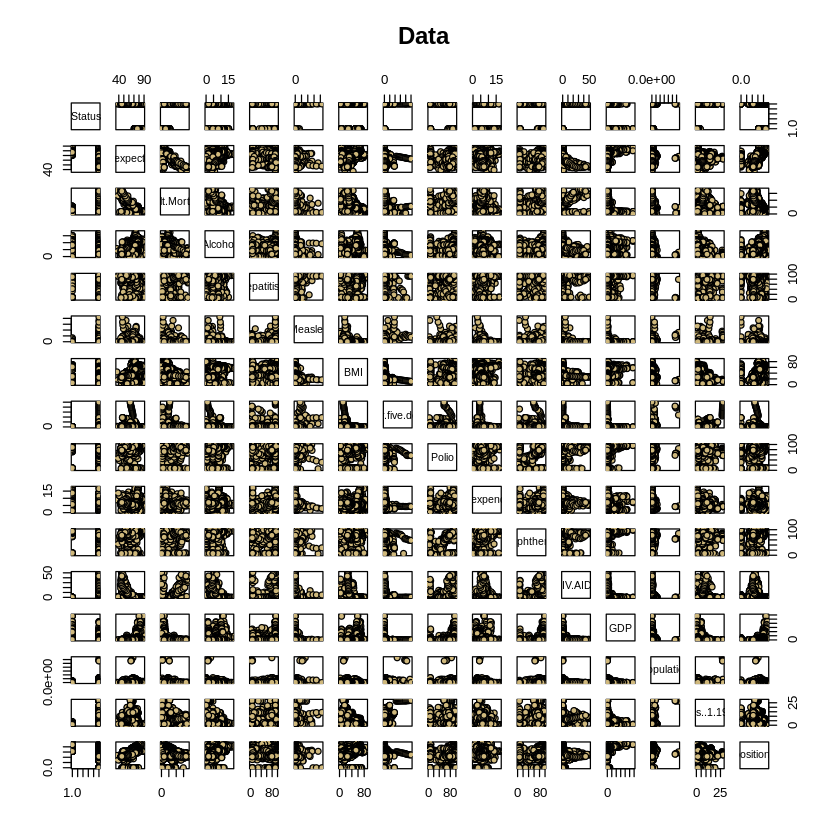

In [19]:
pairs(df, main = " Data", pch = 21,
      bg = c("#CFB87C"))

### T Test 1: Life Expectancy by Development Status
### Null Hypothesis (H0): The mean life expectancy is the same in developed and developing countries.
### Alternative Hypothesis (H1): The mean life expectancy differs between developed and developing countries.

In [20]:
life_expectancy_developed <- filter(df, Status == 'Developed')$Life.expectancy
life_expectancy_developing <- filter(df, Status == 'Developing')$Life.expectancy
t_test1_results <- t.test(life_expectancy_developed, life_expectancy_developing, alternative = 'two.sided', var.equal = FALSE)
t_test1_results


	Welch Two Sample t-test

data:  life_expectancy_developed and life_expectancy_developing
t = 47.875, df = 1800.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.57153 12.56012
sample estimates:
mean of x mean of y 
 79.19785  67.13203 


We will reject the null hypothesis and conclude that here is a significant difference in life expectancy between developed and developing countries, with developed countries having a higher life expectancy as indicated above.

### T Test 2: Impact of Alcohol Consumption on Life Expectancy
### Null Hypothesis (H0): There is no difference in mean life expectancy between countries with high alcohol consumption and those with low or moderate alcohol consumption.
### Alternative Hypothesis (H1): Countries with high alcohol consumption have a different mean life expectancy compared to those with low or moderate alcohol consumption.

In [21]:
high_alcohol <- filter(df, Alcohol > median(df$Alcohol, na.rm = TRUE))$Life.expectancy
low_alcohol <- filter(df, Alcohol <= median(df$Alcohol, na.rm = TRUE))$Life.expectancy
t_test2_results <- t.test(high_alcohol, low_alcohol, alternative = 'two.sided', var.equal = FALSE)
t_test2_results


	Welch Two Sample t-test

data:  high_alcohol and low_alcohol
t = 18.483, df = 2928.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.488386 6.791058
sample estimates:
mean of x mean of y 
 72.31503  66.17531 


We will reject the null hypothesis and conclude that there is a significant difference in life expectancy between groups with high alcohol consumption and  lower alcohol consumption, where higher alcohol consumption is associated with a lower life expectancy.

### **F-test**

Null Hypothesis: $H_0 = $ Reduced model is sufficient  
Alternative Hypothesis: $H_1 = $ Reduced model is not sufficient  


In [22]:
red_model <- lm(Life.expectancy ~ 1, data = df)
ful_model <- lm(Life.expectancy ~ Status + Adult.Mortality + Alcohol + Hepatitis.B + Measles + BMI + under.five.deaths + Polio + Total.expenditure + Diphtheria + HIV.AIDS + GDP + Population + thinness..1.19.years + Income.composition.of.resources, data = df)

In [23]:
anova(red_model, ful_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2937,265573.14,NA,NA,NA,NA
2,2922,54187.64,15,211385.5,759.9131,0


Based on above output, we reject null hypothesis and conclude that atleast one among all predictors is required for predicting target variable.

## Regression Modelling

In [24]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [25]:
set.seed(20)
n = floor(0.8 * nrow(df))
index = sample(seq_len(nrow(df)), size = n)
train = df[index, ]
test = df[-index, ]

In [26]:
model_full<- lm(Life.expectancy~., data = train)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.1267  -2.3813  -0.1337   2.3378  19.1048 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.837e+01  7.686e-01  75.942  < 2e-16 ***
StatusDeveloping                -2.049e+00  3.245e-01  -6.316 3.20e-10 ***
Adult.Mortality                 -2.072e-02  9.550e-04 -21.695  < 2e-16 ***
Alcohol                          1.071e-01  3.014e-02   3.555 0.000386 ***
Hepatitis.B                     -2.146e-02  4.423e-03  -4.852 1.30e-06 ***
Measles                         -2.084e-05  9.100e-06  -2.290 0.022107 *  
BMI                              5.324e-02  5.821e-03   9.145  < 2e-16 ***
under.five.deaths               -2.597e-03  8.129e-04  -3.195 0.001416 ** 
Polio                            3.779e-02  5.360e-03   7.051 2.33e-12 ***
Total.expenditure                1.055e-01  4.107e-02   2.568 0.010297 *  
D

MLR model as follows:

$\widehat\beta_0 = 54.18, \widehat\beta_1 = -1.111, \widehat\beta_2 = -0.01584, , \widehat\beta_3 = -0.1064, \widehat\beta_4 = 0.0003945, \widehat\beta_5 = -0.006863, \widehat\beta_6 = -0.00001158, \widehat\beta_7 = 0.03477,\widehat\beta_8 =-0.07487,\widehat\beta_9=0.007007,\widehat\beta_{10}=0.08049,\widehat\beta_{11}=0.0163,\widehat\beta_{12}=-0.4293,\widehat\beta_{13}=0.00000627,\widehat\beta_{14}=-0.0000000003694,\widehat\beta_{15}=0.009449,,\widehat\beta_{16}=10.61$  


$ Life.expectancy = 54.18 - 1.111 \times \text{StatusDeveloping} - 0.01584 \times \text{Adult.Mortality}  - 0.1064 \times \text{Alcohol} + 0.0003945 \times \text{percentage.expenditure} - 0.006863 \times \text{Hepatitis.B} - 0.00001158 \times \text{Measles} + 0.03477 \times \text{BMI} - 0.07487 \times \text{under.five.deaths} + 0.007007 \times \text{Polio} + 0.08049 \times \text{Total.expenditure} + 0.0163 \times \text{Diphtheria} - 0.4293 \times \text{HIV.AIDS} + 0.00000627 \times \text{GDP} - 0.0000000003694 \times \text{Population} + 0.009449 \times \text{thinness..1.19.years} + 10.61 \times \text{Income.composition.of.resources} $

In [27]:
predicted_values <- predict(model_full, newdata = test)

mspe <- mean((test$Life.expectancy - predicted_values)^2)
print(mspe)

[1] 16.31475


Now, we will try to reduce the predictors and calculate the MSPE for each model. We will be considering the model with least MSPE as the best model. Here we will try to remove `Population` variable.

In [28]:
model_full<- update(model_full,.~.-Population)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + Measles + BMI + under.five.deaths + Polio + 
    Total.expenditure + Diphtheria + HIV.AIDS + GDP + thinness..1.19.years + 
    Income.composition.of.resources, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.1241  -2.3922  -0.1203   2.3573  19.1356 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.832e+01  7.689e-01  75.846  < 2e-16 ***
StatusDeveloping                -2.042e+00  3.247e-01  -6.288 3.82e-10 ***
Adult.Mortality                 -2.075e-02  9.557e-04 -21.710  < 2e-16 ***
Alcohol                          1.079e-01  3.016e-02   3.578 0.000353 ***
Hepatitis.B                     -2.228e-02  4.411e-03  -5.052 4.71e-07 ***
Measles                         -2.179e-05  9.098e-06  -2.395 0.016696 *  
BMI                              5.363e-02  5.823e-03   9.209  < 2e-16 ***
under.five.de

In [29]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
print(mspe)

[1] 16.33199


In [30]:
model_full<- update(model_full,.~.-thinness..1.19.years)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + Measles + BMI + under.five.deaths + Polio + 
    Total.expenditure + Diphtheria + HIV.AIDS + GDP + Income.composition.of.resources, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.3509  -2.4179  -0.0879   2.3137  19.3684 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.786e+01  7.366e-01  78.553  < 2e-16 ***
StatusDeveloping                -2.084e+00  3.243e-01  -6.425 1.59e-10 ***
Adult.Mortality                 -2.079e-02  9.562e-04 -21.738  < 2e-16 ***
Alcohol                          1.208e-01  2.952e-02   4.094 4.39e-05 ***
Hepatitis.B                     -2.263e-02  4.410e-03  -5.132 3.11e-07 ***
Measles                         -2.110e-05  9.098e-06  -2.319 0.020475 *  
BMI                              5.741e-02  5.527e-03  10.387  < 2e-16 ***
under.five.deaths               -2.3

In [31]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.37132

In [32]:
model_full<- update(model_full,.~.-Measles)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + BMI + under.five.deaths + Polio + Total.expenditure + 
    Diphtheria + HIV.AIDS + GDP + Income.composition.of.resources, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.271  -2.429  -0.077   2.339  19.441 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.774e+01  7.355e-01  78.505  < 2e-16 ***
StatusDeveloping                -2.101e+00  3.245e-01  -6.474 1.16e-10 ***
Adult.Mortality                 -2.061e-02  9.539e-04 -21.601  < 2e-16 ***
Alcohol                          1.162e-01  2.948e-02   3.942 8.31e-05 ***
Hepatitis.B                     -2.307e-02  4.411e-03  -5.231 1.84e-07 ***
BMI                              5.799e-02  5.526e-03  10.493  < 2e-16 ***
under.five.deaths               -3.087e-03  5.636e-04  -5.477 4.79e-08 ***
Polio                            3.789e-02  5.369e-03   

In [33]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.37281

In [34]:
model_full<- update(model_full,.~.-Total.expenditure)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + BMI + under.five.deaths + Polio + Diphtheria + 
    HIV.AIDS + GDP + Income.composition.of.resources, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5524  -2.4430  -0.0919   2.2913  19.1812 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.849e+01  6.889e-01  84.912  < 2e-16 ***
StatusDeveloping                -2.256e+00  3.206e-01  -7.037 2.56e-12 ***
Adult.Mortality                 -2.064e-02  9.553e-04 -21.609  < 2e-16 ***
Alcohol                          1.277e-01  2.925e-02   4.364 1.33e-05 ***
Hepatitis.B                     -2.365e-02  4.413e-03  -5.359 9.17e-08 ***
BMI                              6.016e-02  5.483e-03  10.973  < 2e-16 ***
under.five.deaths               -3.197e-03  5.632e-04  -5.676 1.55e-08 ***
Polio                            3.820e-02  5.376e-03   7.106 1.58e-12 

In [35]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.42623

In [36]:
model_full<- update(model_full,.~.-Alcohol)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Hepatitis.B + 
    BMI + under.five.deaths + Polio + Diphtheria + HIV.AIDS + 
    GDP + Income.composition.of.resources, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.2864  -2.4829  -0.1242   2.3325  19.6660 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.911e+01  6.770e-01  87.314  < 2e-16 ***
StatusDeveloping                -2.864e+00  2.898e-01  -9.884  < 2e-16 ***
Adult.Mortality                 -2.039e-02  9.573e-04 -21.304  < 2e-16 ***
Hepatitis.B                     -2.401e-02  4.429e-03  -5.422 6.50e-08 ***
BMI                              6.293e-02  5.467e-03  11.511  < 2e-16 ***
under.five.deaths               -3.202e-03  5.654e-04  -5.663 1.67e-08 ***
Polio                            3.861e-02  5.396e-03   7.154 1.12e-12 ***
Diphtheria                       5.360e-02  5.533e-03   9.687  < 2e-16 ***
HIV.AI

In [37]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.59252

In [38]:
model_full<- update(model_full,.~.-Hepatitis.B)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    under.five.deaths + Polio + Diphtheria + HIV.AIDS + GDP + 
    Income.composition.of.resources, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5421  -2.4657  -0.0909   2.3511  19.8320 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.776e+01  6.333e-01  91.207  < 2e-16 ***
StatusDeveloping                -2.763e+00  2.909e-01  -9.497  < 2e-16 ***
Adult.Mortality                 -2.036e-02  9.631e-04 -21.136  < 2e-16 ***
BMI                              6.384e-02  5.498e-03  11.612  < 2e-16 ***
under.five.deaths               -2.861e-03  5.653e-04  -5.062 4.47e-07 ***
Polio                            3.608e-02  5.409e-03   6.671 3.16e-11 ***
Diphtheria                       4.456e-02  5.308e-03   8.395  < 2e-16 ***
HIV.AIDS                        -4.726e-01  2.177e-02 -21.709  < 2e-16 ***
GDP                 

In [39]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.66689

In [40]:
model_full<- update(model_full,.~.-under.five.deaths)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    Polio + Diphtheria + HIV.AIDS + GDP + Income.composition.of.resources, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.3745  -2.4401  -0.1098   2.3079  20.1081 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.714e+01  6.246e-01  91.478  < 2e-16 ***
StatusDeveloping                -2.786e+00  2.924e-01  -9.527  < 2e-16 ***
Adult.Mortality                 -2.018e-02  9.675e-04 -20.856  < 2e-16 ***
BMI                              6.834e-02  5.453e-03  12.532  < 2e-16 ***
Polio                            3.754e-02  5.429e-03   6.915 6.02e-12 ***
Diphtheria                       4.626e-02  5.325e-03   8.687  < 2e-16 ***
HIV.AIDS                        -4.704e-01  2.188e-02 -21.499  < 2e-16 ***
GDP                              5.163e-05  8.076e-06   6.394 1.95e-10 ***
Income.composition.of.resources  1.379e+

In [41]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 16.89996

In [42]:
model_full<- update(model_full,.~.-Polio)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    Diphtheria + HIV.AIDS + GDP + Income.composition.of.resources, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6461  -2.4109  -0.0443   2.2947  20.6678 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.814e+01  6.136e-01  94.756  < 2e-16 ***
StatusDeveloping                -2.834e+00  2.952e-01  -9.598  < 2e-16 ***
Adult.Mortality                 -2.037e-02  9.767e-04 -20.852  < 2e-16 ***
BMI                              7.056e-02  5.498e-03  12.834  < 2e-16 ***
Diphtheria                       6.898e-02  4.232e-03  16.298  < 2e-16 ***
HIV.AIDS                        -4.708e-01  2.210e-02 -21.304  < 2e-16 ***
GDP                              5.258e-05  8.155e-06   6.448 1.37e-10 ***
Income.composition.of.resources  1.412e+01  6.154e-01  22.940  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

In [43]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 17.1751

In [44]:
model_full<- update(model_full,.~.-GDP)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    Diphtheria + HIV.AIDS + Income.composition.of.resources, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6238  -2.4055  -0.1096   2.3140  21.1466 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     58.4420236  0.6170919   94.71   <2e-16 ***
StatusDeveloping                -3.4211264  0.2832455  -12.08   <2e-16 ***
Adult.Mortality                 -0.0207673  0.0009831  -21.12   <2e-16 ***
BMI                              0.0714517  0.0055437   12.89   <2e-16 ***
Diphtheria                       0.0686565  0.0042685   16.09   <2e-16 ***
HIV.AIDS                        -0.4658259  0.0222743  -20.91   <2e-16 ***
Income.composition.of.resources 15.0467324  0.6035087   24.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.541 on 2343 degrees of freedom
Mul

In [45]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 17.43804

I have removed features one by one as part of backward selection process, however I observed very little or no change in MSPE and Adj $R^2$. Upon observing these values over iterations, hardly MSPE increased from xx to 17.43 and $R_a^2$ decreased from xx to 77.6\%. I see this as a trade-off between complexity of model and prediction accuracy. Also, I would tend to select a more interpretable and less complicated model if we could achieve reasonably good accuracies by sacrificing few predictors. I believe it's worth doing that as industry needs simple and straightforward models without compromising on performance. We will one more iteration to see any significant change in these values. If there is, we need to stop at that iteration and can chooxse model.

In [46]:
model_full<- update(model_full,.~.-Income.composition.of.resources)
summary(model_full)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    Diphtheria + HIV.AIDS, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.3407  -2.8041   0.1956   2.8426  15.5823 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      67.155424   0.571968  117.41   <2e-16 ***
StatusDeveloping -5.662961   0.302066  -18.75   <2e-16 ***
Adult.Mortality  -0.025609   0.001084  -23.63   <2e-16 ***
BMI               0.113388   0.005941   19.09   <2e-16 ***
Diphtheria        0.090665   0.004697   19.30   <2e-16 ***
HIV.AIDS         -0.472104   0.025048  -18.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.107 on 2344 degrees of freedom
Multiple R-squared:  0.7172,	Adjusted R-squared:  0.7166 
F-statistic:  1189 on 5 and 2344 DF,  p-value: < 2.2e-16


In [47]:
predicted_values <- predict(model_full, newdata = test)
mspe <- mean((test$Life.expectancy - predicted_values)^2)
mspe

[1] 21.64095

As described above, there is a significant drop of around 6\% in $R_a^2$ and remarkable increase in MSPE to $21.64$ after dropping `Income.composition.of.resources`. This means that we need to stop our iterations here and best model would be Life.expectancy ~ Status + Adult.Mortality + BMI +
    Diphtheria + HIV.AIDS + Income.composition.of.resources,
    data = train


In [48]:
model_full <- lm(Life.expectancy ~ Status + Adult.Mortality + BMI +
    Diphtheria + HIV.AIDS + Income.composition.of.resources,
    data = train)

In [49]:
model_full


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + BMI + 
    Diphtheria + HIV.AIDS + Income.composition.of.resources, 
    data = train)

Coefficients:
                    (Intercept)                 StatusDeveloping  
                       58.44202                         -3.42113  
                Adult.Mortality                              BMI  
                       -0.02077                          0.07145  
                     Diphtheria                         HIV.AIDS  
                        0.06866                         -0.46583  
Income.composition.of.resources  
                       15.04673  


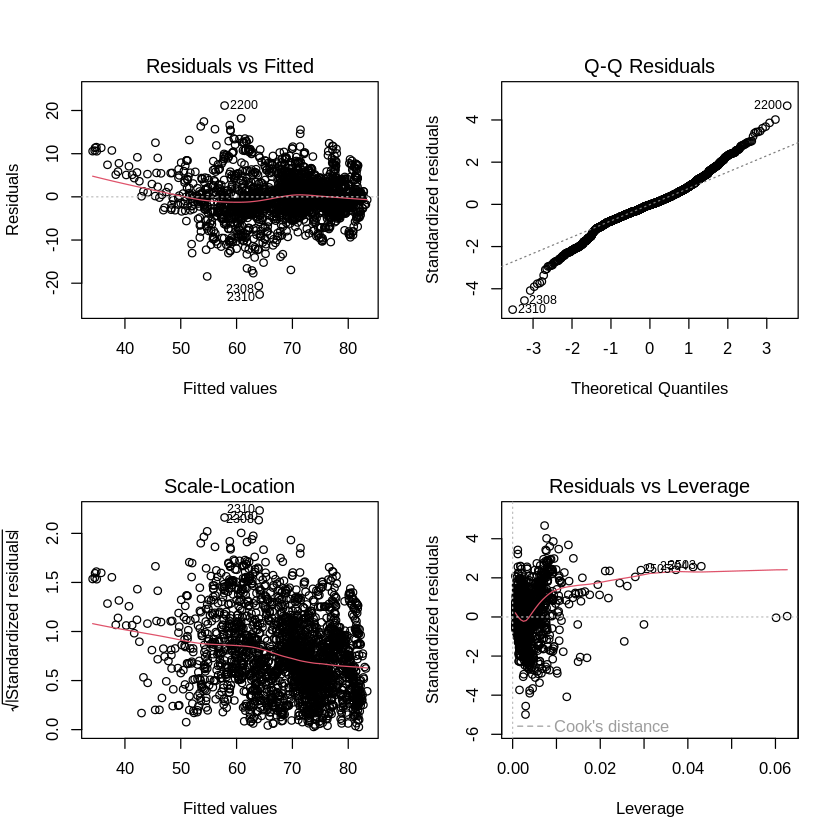

In [50]:
# Model Diagnostics
par(mfrow=c(2,2))
plot(model_full)

From the above Residual vs Fitted graph, we can see that the points are scattered randomly, without having any pattern, this shows that the homoscedasticity is met.

From the Q-Q plot, we can see that the points are coinciding with theoretical straight line in the middle and there are some deviations at the extremes in the plot. Though this not perfect normal, at the same time it is not serious enough to reject the normality of residuals.

From the residuals vs leverage plot, we can see that there are some influential points that might affect the model's preditctions. Removing these points might impact model's performance.

In [51]:
df.diagnostics = data.frame(yhat = fitted(model_full), r = resid(model_full), y = train$Life.expectancy)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


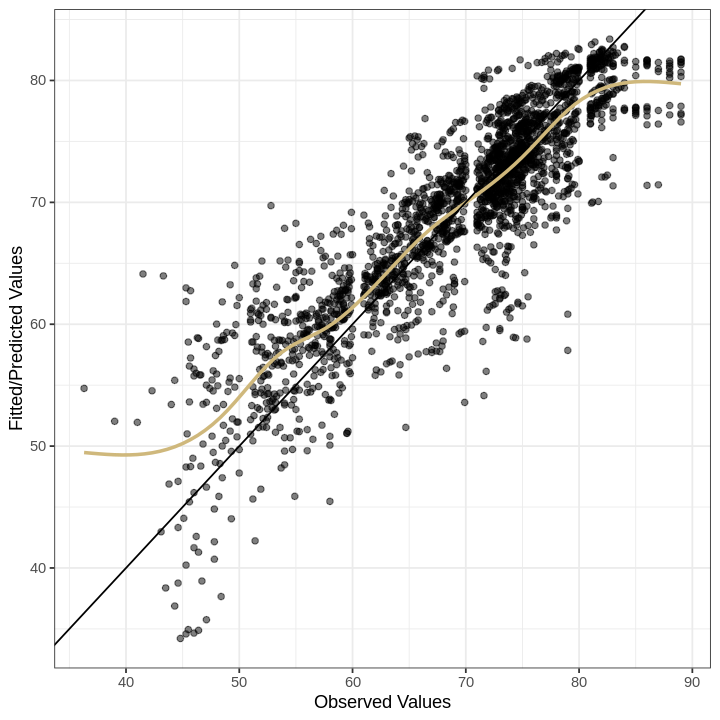

In [52]:
options(repr.plot.width = 6, repr.plot.height = 6)
ggplot(df.diagnostics, aes(x = y, y = yhat)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "#CFB87C") +
    geom_abline(intercept = 0, slope = 1)+
    xlab("Observed Values") +
    ylab("Fitted/Predicted Values") +
    theme_bw()

For lower values it is predicting more than expected. For higher values it is predicting less than the oberserved values. There might be a chance of bias.From backward selection, the regression is as follows: Life.expectancy ~ Status + Adult.Mortality + BMI + Diphtheria + HIV.AIDS + Income.composition.of.resources

### Model Selection

In [53]:
install.packages("leaps")
library(leaps)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [54]:
n = dim(df)[1]
reg1 = regsubsets(Life.expectancy ~ Status + Adult.Mortality + Alcohol +
    Hepatitis.B + BMI + under.five.deaths + Polio + Total.expenditure +
    Diphtheria + HIV.AIDS + GDP + Income.composition.of.resources, data = train, nvmax=12)
rs = summary(reg1)
rs$which

,(Intercept),StatusDeveloping,Adult.Mortality,Alcohol,Hepatitis.B,BMI,under.five.deaths,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Income.composition.of.resources
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
3,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE
4,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
6,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
7,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE
8,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
9,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE


The above table provides information of best model in terms of RSS of size K=1,2,3........,12.

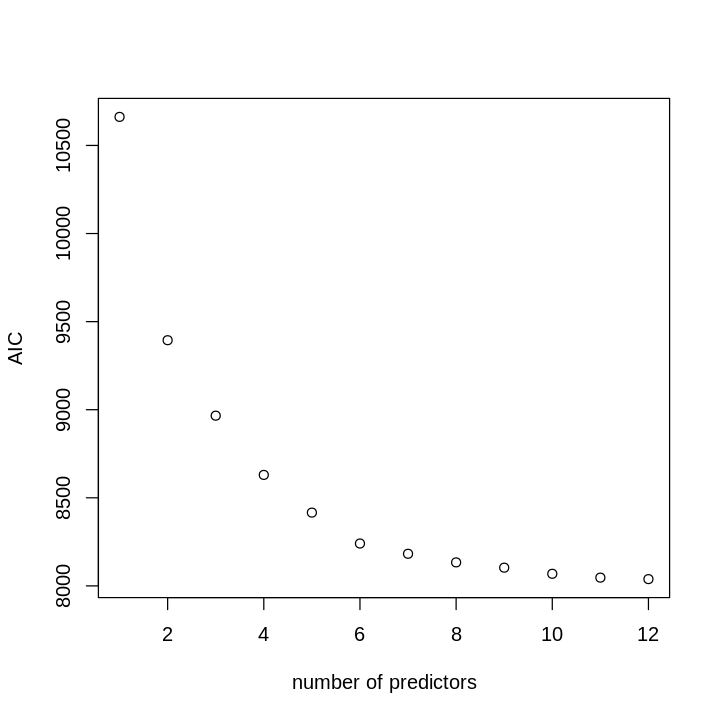

In [55]:
AIC = 2*(2:13) + n*log(rs$rss/n)
plot(AIC ~ I(1:12), xlab = "number of predictors", ylab = "AIC")

From the above plot we can see that model(k)=10, has the lowest AIC. From k=10 the curve looks almost flat, we can go with 10 predictors for linear regression model.


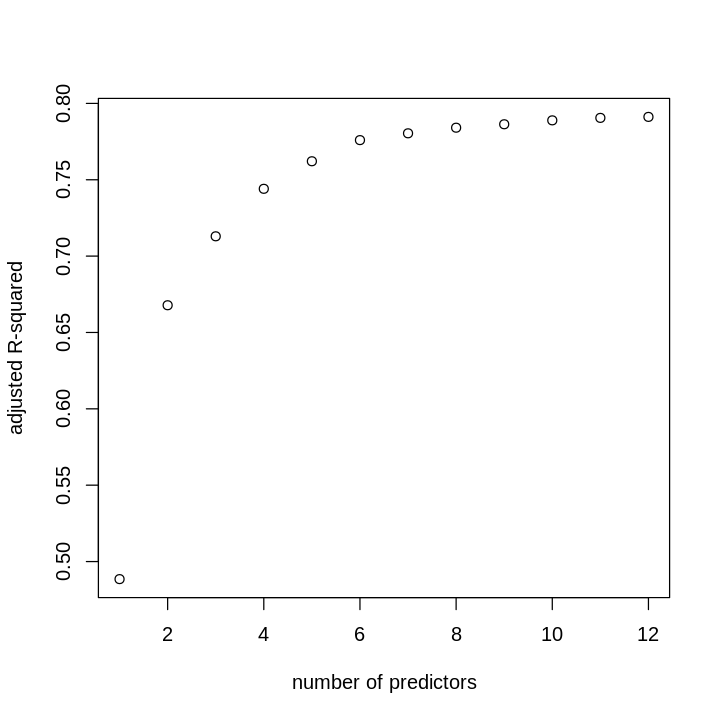

In [56]:
plot(1:12, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

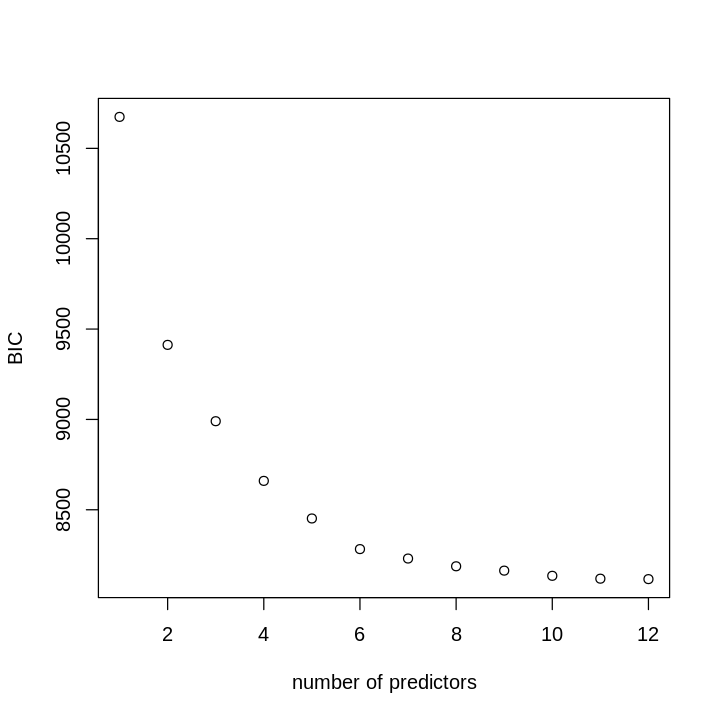

In [57]:
BIC = log(n)*(2:13) + n*log(rs$rss/n)
plot(BIC ~ I(1:12), xlab = "number of predictors", ylab = "BIC")

From the above plot we are getting the same model as AIC and R-squared with 10 predictors. Now, we will check the evidence of collinearity between our predictors using VIF.

In [58]:
lm_aic = lm(Life.expectancy ~ Status + Adult.Mortality +Hepatitis.B+ BMI +under.five.deaths+Polio+Diphtheria + HIV.AIDS + GDP+Income.composition.of.resources,data = train)
vif(lm_aic)
kappa(lm_aic)
cor(model.matrix(lm_aic)[,-1])

Status                 Adult.Mortality 
                       1.451389                        1.733593 
                    Hepatitis.B                             BMI 
                       1.287837                        1.444507 
              under.five.deaths                           Polio 
                       1.096947                        1.927115 
                     Diphtheria                        HIV.AIDS 
                       2.125252                        1.425455 
                            GDP Income.composition.of.resources 
                       1.394298                        1.834307

[1] 173420.4

,StatusDeveloping,Adult.Mortality,Hepatitis.B,BMI,under.five.deaths,Polio,Diphtheria,HIV.AIDS,GDP,Income.composition.of.resources
StatusDeveloping,1.0000000,0.31704038,-0.13044461,-0.3017484,0.11273618,-0.2179678,-0.2120589,0.15039604,-0.45966183,-0.4613313
Adult.Mortality,0.3170404,1.00000000,-0.10836989,-0.3812972,0.07802194,-0.2587211,-0.2696211,0.54105601,-0.27636965,-0.4430264
Hepatitis.B,-0.1304446,-0.10836989,1.00000000,0.1067408,-0.17827122,0.3570590,0.4469367,-0.06291413,0.07729116,0.1131077
BMI,-0.3017484,-0.38129722,0.10674085,1.0000000,-0.23329714,0.2878016,0.2893996,-0.25250068,0.26468546,0.4863720
under.five.deaths,0.1127362,0.07802194,-0.17827122,-0.2332971,1.00000000,-0.1841085,-0.1878317,0.03891404,-0.10401898,-0.1667742
Polio,-0.2179678,-0.25872110,0.35705901,0.2878016,-0.18410847,1.0000000,0.6768474,-0.16575578,0.18624590,0.3561850
Diphtheria,-0.2120589,-0.26962105,0.44693665,0.2893996,-0.18783170,0.6768474,1.0000000,-0.18009295,0.17343744,0.3662235
HIV.AIDS,0.1503960,0.54105601,-0.06291413,-0.2525007,0.03891404,-0.1657558,-0.1800929,1.00000000,-0.12420311,-0.2597162
GDP,-0.4596618,-0.27636965,0.07729116,0.2646855,-0.10401898,0.1862459,0.1734374,-0.12420311,1.00000000,0.4421591
Income.composition.of.resources,-0.4613313,-0.44302642,0.11310767,0.4863720,-0.16677418,0.3561850,0.3662235,-0.25971624,0.44215911,1.0000000


In [59]:
summary(lm_aic)


Call:
lm(formula = Life.expectancy ~ Status + Adult.Mortality + Hepatitis.B + 
    BMI + under.five.deaths + Polio + Diphtheria + HIV.AIDS + 
    GDP + Income.composition.of.resources, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.2864  -2.4829  -0.1242   2.3325  19.6660 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.911e+01  6.770e-01  87.314  < 2e-16 ***
StatusDeveloping                -2.864e+00  2.898e-01  -9.884  < 2e-16 ***
Adult.Mortality                 -2.039e-02  9.573e-04 -21.304  < 2e-16 ***
Hepatitis.B                     -2.401e-02  4.429e-03  -5.422 6.50e-08 ***
BMI                              6.293e-02  5.467e-03  11.511  < 2e-16 ***
under.five.deaths               -3.202e-03  5.654e-04  -5.663 1.67e-08 ***
Polio                            3.861e-02  5.396e-03   7.154 1.12e-12 ***
Diphtheria                       5.360e-02  5.533e-03   9.687  < 2e-16 ***
HIV.AI

From the above model, we can see that VIF value for each variable is less than 5, this suggests that there is no evidence of collinearity.

Now, let's calculate MSPE for the models done through backward selection and AIC,BIC, R-squared.

In [60]:
back_pred = predict(model_full, newdata=test)

In [61]:
squared_residuals <- (test$Life.expectancy - back_pred)^2
MSPE_back <- mean(squared_residuals)
MSPE_back

[1] 17.43804

In [62]:
aic_pred = predict(lm_aic, newdata=test)

In [63]:
squared_residuals <- (test$Life.expectancy - aic_pred)^2
MSPE_aic <- mean(squared_residuals)
MSPE_aic

[1] 16.59252

On comparing the MSPE values we are seeing slight difference of 0.2 which in negligible on the test data.


## GLM


In [64]:
glm_model <- glm(Life.expectancy ~ Status + Adult.Mortality + Alcohol + Hepatitis.B + Measles + BMI + under.five.deaths + Polio + Total.expenditure + Diphtheria + HIV.AIDS + GDP + Population + thinness..1.19.years + Income.composition.of.resources, data = df, family = "gaussian")
summary(glm_model)


Call:
glm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + Measles + BMI + under.five.deaths + Polio + 
    Total.expenditure + Diphtheria + HIV.AIDS + GDP + Population + 
    thinness..1.19.years + Income.composition.of.resources, family = "gaussian", 
    data = df)

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.860e+01  6.762e-01  86.660  < 2e-16 ***
StatusDeveloping                -1.863e+00  2.855e-01  -6.525 7.97e-11 ***
Adult.Mortality                 -2.144e-02  8.393e-04 -25.543  < 2e-16 ***
Alcohol                          1.068e-01  2.671e-02   3.996 6.59e-05 ***
Hepatitis.B                     -2.047e-02  3.942e-03  -5.193 2.21e-07 ***
Measles                         -1.936e-05  8.122e-06  -2.383 0.017217 *  
BMI                              5.510e-02  5.160e-03  10.679  < 2e-16 ***
under.five.deaths               -2.712e-03  7.277e-04  -3.727 0.000198 ***
Polio

In [65]:
glm_pred = predict(glm_model, newdata=test)

In [66]:
squared_residuals <- (test$Life.expectancy - glm_pred)^2
MSPE_back <- mean(squared_residuals)
MSPE_back

[1] 16.16347

From the above we can say that MSPE is less for GLM model.

In [67]:
glm_reduced <- glm(Life.expectancy ~ Status + Adult.Mortality + Alcohol + Hepatitis.B + Measles + BMI + under.five.deaths + Polio + Total.expenditure + Diphtheria + HIV.AIDS + GDP + Population + thinness..1.19.years, data = df, family = "gaussian")
summary(glm_reduced)


Call:
glm(formula = Life.expectancy ~ Status + Adult.Mortality + Alcohol + 
    Hepatitis.B + Measles + BMI + under.five.deaths + Polio + 
    Total.expenditure + Diphtheria + HIV.AIDS + GDP + Population + 
    thinness..1.19.years, family = "gaussian", data = df)

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.544e+01  6.696e-01  97.737  < 2e-16 ***
StatusDeveloping     -2.759e+00  3.094e-01  -8.916  < 2e-16 ***
Adult.Mortality      -2.505e-02  9.026e-04 -27.751  < 2e-16 ***
Alcohol               1.966e-01  2.891e-02   6.801 1.26e-11 ***
Hepatitis.B          -2.724e-02  4.298e-03  -6.336 2.71e-10 ***
Measles              -2.335e-05  8.877e-06  -2.630 0.008580 ** 
BMI                   8.127e-02  5.512e-03  14.743  < 2e-16 ***
under.five.deaths    -2.728e-03  7.955e-04  -3.430 0.000612 ***
Polio                 4.409e-02  5.139e-03   8.580  < 2e-16 ***
Total.expenditure     3.938e-02  3.913e-02   1.006 0.314294    
Diphtheria     

In [68]:
glm_red = predict(glm_reduced, newdata=test)

In [69]:
squared_residuals <- (test$Life.expectancy - glm_red)^2
MSPE_back <- mean(squared_residuals)
MSPE_back

[1] 19.64777

By comparing the two MSPE's it is evident that the model with all variables has the least MSPE.

#ANOVA

Null Hypothesis: $H_0 = $ Reduced model is sufficient  
Alternative Hypothesis: $H_1 = $ Reduced model is not sufficient  


In [70]:
anova(glm_reduced,glm_model)

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2923,64781.94,NA,NA,NA,NA
2,2922,54187.64,1,10594.31,571.2847,1.800701e-115


From the above ANOVA table, we can see the output of F-statistic and p-value. It suggests we are rejecting the null hypothesis. We are concluding that reduced model is not sufficient.

### Report

#### Introduction and Background:

Life expectancy is very crucial indicator for a country well-being. My interest in this area has started during my under-grad final semester. During my under-grad I have done some research on health care predictive analytics. At that time I was curious about how socioeconomic and environmental factors influence public health outcomes. I have explored more public health policies that can provide some information about differences in health outcomes.


Significant research has been done in this topic, highlighting various factors that influence life expectancy. Some studies suggests that longer life expectancy correlates with higher income due to better access of health care system. Moreover, a research conducted by the World Health Organization shows that preventive health care and regular health checkups can improve the life expectancy outcomes. Also, in some parts of the past research was done considering multiple linear regression on the test set for a span of one year. This gives me the motivation to implement multiple linear regression from 2000 to 2015 years for all countries. This will help for a country in suggesting which area should be given importance to improve the life expectancy.



## Further Reading:

Life expectancy is defined as the average number of years a person who can survive at current mortality rates and other factors in the country at the time of birth. It is a vital metric used by health care officals, policy makers to measure overall health of the population.

This data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang. In-depth research of this topic is found here [here](https://www.irjet.net/archives/V8/i7/IRJET-V8I7785.pdf). In this project my aim is to know how long people live in different countries and want to learn what factor affects.I plan to test hypothesis about life expectancy around the world. Additionally I will construct a model which predicts life expectancy considering factors such as mortality rate etc. The performance of this model will be evaluated by using metrics such as AIC, BIC, and adjusted R-squared.

##### Implementation of Methods:

This data is obtained from Kaggle website can be found here [here](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). The methodology is as follows:

1. Data Cleaning and visualisation: There are missing values in the dataset. Box plots were drawn for better understanding. Missing values are replaced with a  boxplots containing more outilers with mean and the box plots containing less outliers are replaced with median.

2. Analysis:

  Validation of Hypothesis statements: I have carried out t-test to see the life expectancy across developed and developing countries. I have done another hypothesis test to see the impact of alochol on life expectancy.

  F-Test: This test is conducted to see if there is atleast any predictor which is significantly contributing to prediction of output. This can be known by doing full F-test.

  Regression Modelling: I have used MLR and choosed features using backward selection process. I repeated the process for few times like 8-9 iterations, until my model included only the most important predictors. After that I have chosen the best model.

  Diagnosis Plots: I have plotted diagnostics to check whether the model fits the data well. The satisfactory conditions of assumptions which I got in above plots reflects that model fits linearity assumption. In fitted and observed values graph it showed that the model, for lower values it is predicting more than expected. For higher values it is predicting less than the oberserved values.

  Selection of Model based on metrics (AIC, BIC, $R_a^2$): `regsubsets()` is used to identify best model at each size of n. The output shows the best combination of features in every row and indicated as TRUE. Then again models with different number of predictors can't be compared by using $R^2$. So, AIC, BIC, adj R-sq plots were drawn to identify best model.

  Generalized Linear Modeling: It is carried out when the response variables have error distribution models other than guassian distribution.It shows that the GLM model is the best fit model.

3. Discussion of results:
    
  Hypothesis test 1: We will reject the null hypothesis and conclude that here is a significant difference in life expectancy between developed and developing countries, with developed countries having a higher life expectancy. Below is the snippet of the result.
  > Null Hypothesis (H0): The mean life expectancy is the same in developed and developing countries.

  >Alternative Hypothesis (H1): The mean life expectancy differs between developed and developing countries.

          Welch Two Sample t-test
          data:  life_expectancy_developed and life_expectancy_developing
          t = 47.875, df = 1800.5, p-value < 2.2e-16
          alternative hypothesis: true difference in means is not equal to 0
          95 percent confidence interval:
          11.57153 12.56012
          sample estimates:
          mean of x mean of y
          79.19785  67.13203
  

  Hypothesis test 2: We will reject the null hypothesis and conclude that there is a significant difference in life expectancy between groups with high alcohol consumption and  lower alcohol consumption, where higher alcohol consumption is associated with a lower life expectancy. The snippet of the result is as follows:
  >Null Hypothesis (H0): There is no difference in mean life expectancy between countries with high alcohol consumption and those with low or moderate alcohol consumption.
  
  >Alternative Hypothesis (H1): Countries with high alcohol consumption have a different mean life expectancy compared to those with low or moderate alcohol consumption.
  
  
        Welch Two Sample t-test
        data:  high_alcohol and low_alcohol
        t = 18.483, df = 2928.5, p-value < 2.2e-16
        alternative hypothesis: true difference in means is not equal to 0
        95 percent confidence interval:
        5.488386 6.791058
        sample estimates:
        mean of x mean of y
        72.31503  66.17531
  
  F-test: We reject null hypothesis and conclude that atleast one among all predictors is required for predicting target variable. The snippet of the result is as follows:
  >Null Hypothesis: $H_0 = $ Reduced model is sufficient  
  >Alternative Hypothesis: $H_1 = $ Reduced model is not sufficient  

        A anova: 2 × 6
        Res.Df	RSS	Df	Sum of Sq	F	Pr(>F)
        <dbl>	<dbl>	<dbl>	<dbl>	<dbl>	<dbl>
        1	2937	265573.14	NA	NA	NA	NA
        2	2922	54187.64	15	211385.5	759.9131	0

  MLR:


  The best model is: $$\text{Life expectancy} = 58.442 - 3.421 \times \text{Status (Developing)} - 0.021 \times \text{Adult Mortality} + 0.071 \times \text{BMI} + 0.069 \times \text{Diphtheria} - 0.466 \times \text{HIV/AIDS} + 15.047 \times \text{Income Composition of Resources}$$

  >For every one unit increase in adult mortality rate, life expectancy decreases by 0.0208 years, all other variables are constant.

  Diagnostics: From the plots that are drawn above the model suggests that homoscedasticity and linearity are met.

  Using AIC, BIC, $R_a^2: All the metrics have suggested the model with 10 predictors. The equation is as follows:

  $$
\text{Life expectancy} = 59.11 - 2.864 \times \text{Status} - 0.02039 \times \text{Adult Mortality} - 0.02401 \times \text{Hepatitis B} + 0.06293 \times \text{BMI} - 0.003202 \times \text{under.five.deaths} + 0.03861 \times \text{Polio} + 0.05360 \times \text{Diphtheria} - 0.4716 \times \text{HIV/AIDS} + 0.00005087 \times \text{GDP} + 13.44 \times \text{Income Composition of Resources}
$$

  GLM: After comparing two models using ANOVA — one without income and another with income the results shows that income is a important predictor for GLM model. The equation is as follows:

  $
\text{Life expectancy} = 58.60
- 1.863 \times \text{Status}
- 0.02144 \times \text{Adult Mortality}
+ 0.1068 \times \text{Alcohol}
- 0.02047 \times \text{Hepatitis B}
- 0.00001936 \times \text{Measles}
+ 0.0551 \times \text{BMI}
- 0.002712 \times \text{under.five.deaths}
+ 0.03647 \times \text{Polio}
+ 0.1038 \times \text{Total expenditure}
+ 0.05037 \times \text{Diphtheria}
- 0.4750 \times \text{HIV/AIDS}
+ 0.0000496 \times \text{GDP}
+ 0.000000004144 \times \text{Population}
- 0.0611 \times \text{thinness 1-19 years}
+ 12.65 \times \text{Income Composition of Resources}
$

Final Word:

* People consuming more alcohol have relatively lesser life expectancies than people who don't/low alcohol. This means consumption of alcohol rates has impacted life expectancy.  

* Life expectancy of people living in developed countries is not same as that of people those who are living in developing countries. This shows the real picture of contrasting life styles between developed and developing countries. This may be attributed to the fact that people from developed countries have access to better health care infrastructure facilities. Further research in these lines would help us understand root cause and can pave way for equal quality of life.  

* Performance of GLM is better when compared to linear models because GLM's allows the response variable to have other distributions such as binomial,poisson and GLM's are robust to outliers.


Learnings:
 * I believe that GLM will perform better than other regression models.

